<a href="https://colab.research.google.com/github/shajohn4/Portfolio/blob/main/Prediction_using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing required libraries

In [97]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import linear_model  
from word2number import w2n

import warnings
warnings.filterwarnings("ignore")

In [93]:
pip install word2number

  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5582 sha256=d64e2a5783d755a940c53e355bc9c2d9ce450759e6fc303cbbecff7b5264f8b7
  Stored in directory: /root/.cache/pip/wheels/4b/c3/77/a5f48aeb0d3efb7cd5ad61cbd3da30bbf9ffc9662b07c9f879
Successfully built word2number


Reading the inputfile

In [ ]:
df = pd.read_csv("/homeprices.csv")
df

Function to draw ScatterPlot

In [51]:
def draw_scatterplot(X_Cordinate,Y_Cordinate,X_Label, Y_Label, M_Color, M_Marker):
  %matplotlib inline
  plt.xlabel(X_Label)
  plt.ylabel(Y_Label)
  plt.scatter(X_Cordinate, Y_Cordinate,color = M_Color, marker = M_Marker)

Calling Function to draw the scatterplot

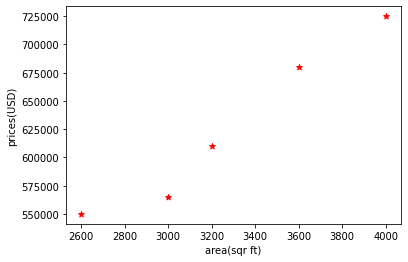

In [52]:
draw_scatterplot(df.area,df.price, 'area(sqr ft)','prices(USD)','red','*')

Defining the Linear Regression Model

In [35]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression()

Calling the Linear Regression Model to predict the values

In [36]:
reg.predict([[3300]])

array([628715.75342466])

Cross-checking if the value predicted is accurate.

In [39]:
# price=m*area + b where m is slope and b is the Y-intercept
print('slope is ', reg.coef_)
print('Y intercept is ',reg.intercept_)
print('Y = mx + 2')
print(reg.coef_*3300+reg.intercept_)

slope is  [135.78767123]
Y intercept is  180616.43835616432
Y = mx + 2
[628715.75342466]


In [ ]:
d = pd.read_csv('/areas.csv')
d

In [42]:
p = reg.predict(d)

In [43]:
d['prices'] = p
d.to_csv('/predictions.csv',index=False)

draw_scatterplot(d.area,df.price, 'area(sqr ft','prices(USD)','red','*')

In [ ]:
df = pd.read_csv('/canada_per_capita_income.csv')
df.head(5)

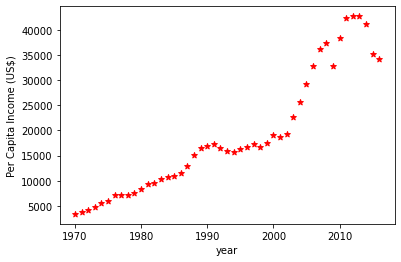

In [54]:
draw_scatterplot(df.year,df['per capita income (US$)'],'year','Per Capita Income (US$)','red','*')

In [57]:
reg = linear_model.LinearRegression()
reg.fit(df[['year']],df['per capita income (US$)'])

LinearRegression()

In [59]:
reg.predict([['2020']])

array([41288.69409442])

In [ ]:
# MultiClass linear regression

In [62]:
df = pd.read_csv('/homeprices_MV.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [73]:
median_bedrooms = math.floor(df.bedrooms.median())
df.bedrooms= df.bedrooms.fillna(median_bedrooms)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [77]:
reg = linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']],df.price)

LinearRegression()

In [78]:
print('coefficient', reg.coef_)
print('Y-Intercept',reg.intercept_)




coefficient [  112.06244194 23388.88007794 -3231.71790863]
Y-Intercept 221323.00186540396


In [83]:
reg.predict([[5000,6,50]])

array([760382.59661206])

In [85]:
df=pd.read_csv('/hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [88]:
df.experience=df.experience.fillna('zero')
df.experience
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [120]:
median_test_score = math.floor( df['test_score(out of 10)'].median())
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(median_test_score)



,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [124]:
# df.experience = df.experience.apply(w2n.word_to_num)
df.experience.astype(float)
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   experience                  8 non-null      int64  
 1   test_score(out of 10)       8 non-null      float64
 2   interview_score(out of 10)  8 non-null      int64  
 3   salary($)                   8 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 384.0 bytes


In [125]:
reg = linear_model.LogisticRegression()
reg.fit(df[['experience','test_score(out of 10)','interview_score(out of 10)']], df['salary($)'])

LogisticRegression()

In [126]:
print('coefficient :', reg.coef_)
print('Y Intercept :', reg.intercept_)

coefficient : [[-0.60394051  0.03025633 -0.71997699]
 [-0.77855807 -0.07111001  0.23788777]
 [ 0.00291385 -0.72079529 -0.34878269]
 [-0.04109057 -0.36431254  0.67727445]
 [-0.12456105  0.78467449  0.49785354]
 [ 0.16638476  0.53267266 -0.53712487]
 [ 0.62121555  0.16170047 -0.14956357]
 [ 0.75763605 -0.35308611  0.34243236]]
Y Intercept : [ 7.94386231  1.4676045   9.20377995 -1.63911276 -9.30656314  0.01278117
 -3.29293595 -4.38941607]


In [128]:
reg.predict([[2,9,6]])

array([45000])

In [129]:
reg.predict([[12,10,10]])

array([80000])